In [48]:
# Basic packages
import numpy as np
import pandas as pd
import math
from termcolor import colored as cl
import operator
from functools import reduce

# Machine Learning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from __future__ import print_function, division

# Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import export_graphviz
import seaborn as sns
from pyecharts import options as opts
from pyecharts.charts import Liquid
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.set_style("white")
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Jason\Desktop\MATH3790 Midterm\M3790_W01_Midterm_Shiyu_Jiang\Growth rates of personal consumption and personal income in the USA.csv')
df1 = df.copy(deep=True)
df.head(5)

,Consumption,Income,Production,Savings,Unemployment
0,0.615986,0.972261,-2.452700,4.810312,0.9
1,0.460376,1.169085,-0.551525,7.287992,0.5
2,0.876791,1.553271,-0.358708,7.289013,0.5
3,-0.274245,-0.255272,-2.185455,0.985230,0.7
4,1.897371,1.987154,1.909734,3.657771,-0.1


Planning to classify the unemployment into three classes, positive value will be assigned to 1, zero value will be assigned to 0, negative value will be assigned to -1.

In [3]:
for i in range(len(df)):
    if df.iloc[i, 4] > 0:
        df.iloc[i, 4] = 1
    elif df.iloc[i, 4] is 0:
        df.iloc[i, 4] = 0
    else:
        df.iloc[i, 4] = -1

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-3-e67b9101c973>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif df.iloc[i, 4] is 0:


In [4]:
df2 = df.copy(deep=True)
df.head(5)

,Consumption,Income,Production,Savings,Unemployment
0,0.615986,0.972261,-2.452700,4.810312,1.0
1,0.460376,1.169085,-0.551525,7.287992,1.0
2,0.876791,1.553271,-0.358708,7.289013,1.0
3,-0.274245,-0.255272,-2.185455,0.985230,1.0
4,1.897371,1.987154,1.909734,3.657771,-1.0


In [5]:
df.isnull().sum()  # there is no null value

Consumption     0
Income          0
Production      0
Savings         0
Unemployment    0
dtype: int64

The dataset is clear and clean, after dealing with classes, we will start to consider about the feature engineering.

Here we will try using principal component analysis to do analysis, maybe we will do the dimensional reduction, then perform data normalization and standarization.

In [6]:
# First check the variance without dimension reduction
X = df.iloc[:,0:4]
pca = PCA(n_components=4)
pca.fit(X)
print('Explained variance ratio before PCA:', pca.explained_variance_ratio_)
print('Explained variance before PCA:', pca.explained_variance_)

Explained variance ratio before PCA: [9.83173276e-01 1.38891114e-02 2.59661180e-03 3.41000379e-04]
Explained variance before PCA: [1.87276952e+02 2.64562770e+00 4.94608179e-01 6.49544828e-02]


In [7]:
# specify principal components at least take 95%
pca = PCA(n_components=0.95)
pca.fit(X)
print("At least 95% are principal components: ")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

At least 95% are principal components: 
[0.98317328]
[187.27695224]
1


In [8]:
# specify principal components at least take 95%
pca = PCA(n_components=0.95)
pca.fit(X)
print("At least 95% are principal components: ")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

At least 95% are principal components: 
[0.98317328]
[187.27695224]
1


In [9]:
# Let MLE algorithm choose the dimension
pca = PCA(n_components='mle')
pca.fit(X)
print("Let MLE algorithm choose the dimension: ")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)

Let MLE algorithm choose the dimension: 
[0.98317328 0.01388911 0.00259661]
[187.27695224   2.6456277    0.49460818]
3


Although the firt component is dominant, but still the MLE algorithm choose to reduce to three dimension since the last component is much smaller in scale.

So next, we will choose to compare using two datasets, one is the original dataset, and the second will be reduced one. 

Reduced training and testing dataset preparation & Pearson Correlation & StandardScaler()

In [10]:
# Let MLE algorithm choose the dimension
pca = PCA(n_components='mle')
pca.fit(X)
x_reduced = pca.fit_transform(X)  # reduce dimension to get X
y_reduced = df[['Unemployment']].values  # Get y ready
x_reduced = StandardScaler().fit(x_reduced).transform(x_reduced.astype(float)) # Standarize X
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y_reduced, 
                                                            test_size=0.2, random_state=4)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

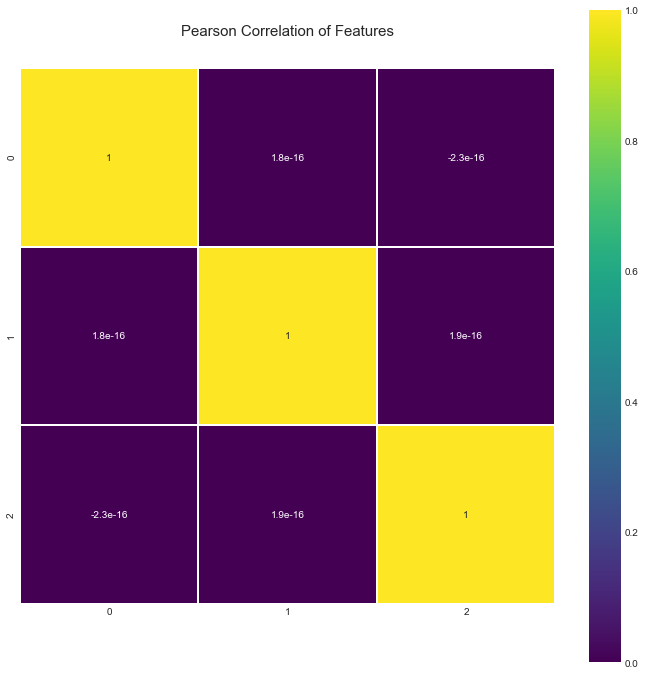

In [11]:
df_reduced_corr = pd.DataFrame(x_reduced)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_reduced_corr.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Original training and testing dataset preparation & & Pearson Correlation & StandardScaler()

In [12]:
x = df[['Consumption','Income','Production','Savings']].values
y = df[['Unemployment']].values
x = StandardScaler().fit(x).transform(x.astype(float)) # Standarize X
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, train_size=0.9)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

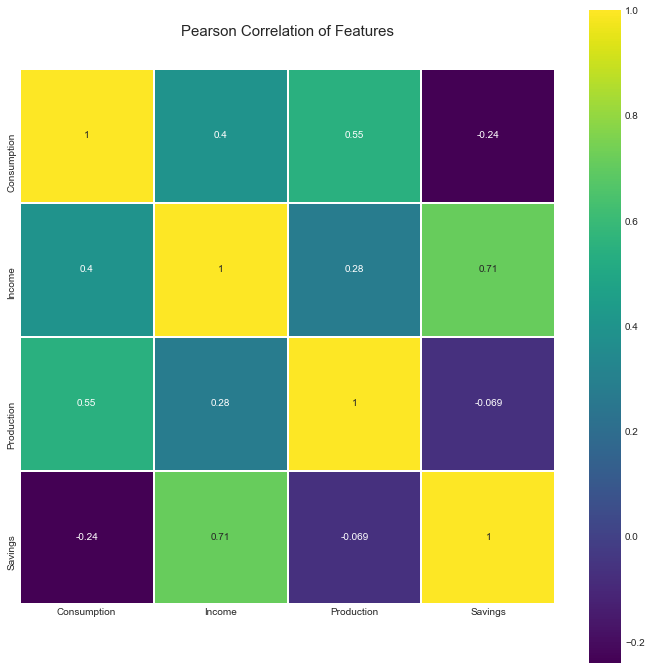

In [13]:
df_original_corr = df1[['Consumption','Income','Production','Savings']]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_original_corr.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

It is clearly to see that after the dimension reduction, the correlation between features is much lower, which will be better for our modeling and make algorithms to be more efficient.

# Model Training

### Support Vector Machine

##### Original dataset

In [14]:
clf = svm.SVC(C=9, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovo')
# clf = svm.SVC(kernel='poly', degree=3, C=1)
# clf = svm.LinearSVC(C=9)
clf.fit(x_train, y_train)

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=9, kernel='linear')

In [15]:
print('The score of the trained model is', clf.score(x_test, y_test))  # Accuracy
y_hat = clf.predict(x_test)
y_hat

The score of the trained model is 0.7894736842105263


array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1.])

In [16]:
print(confusion_matrix(y_test,y_hat))

[[10  0]
 [ 4  5]]


In [17]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

        -1.0       0.71      1.00      0.83        10
         1.0       1.00      0.56      0.71         9

    accuracy                           0.79        19
   macro avg       0.86      0.78      0.77        19
weighted avg       0.85      0.79      0.78        19



In [18]:
print('SVM model is liner kernel with decision function shape ovr, C is 9.')
clf = svm.SVC(C=9, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovo')
# clf = svm.SVC(kernel='poly', degree=3, C=1)
# clf = svm.LinearSVC(C=9)
clf.fit(x_train, y_train)
print('The score of the trained model is', clf.score(x_test, y_test))  # Accuracy
y_hat = clf.predict(x_test)
print('The confusion matrix: \n', confusion_matrix(y_test,y_hat))
print('The classification report: \n',classification_report(y_test,y_hat))

SVM model is liner kernel with decision function shape ovr, C is 9.
The score of the trained model is 0.7894736842105263
The confusion matrix: 
 [[10  0]
 [ 4  5]]
The classification report: 
               precision    recall  f1-score   support

        -1.0       0.71      1.00      0.83        10
         1.0       1.00      0.56      0.71         9

    accuracy                           0.79        19
   macro avg       0.86      0.78      0.77        19
weighted avg       0.85      0.79      0.78        19



e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [19]:
print('SVM model is rbf kernel with decision function shape ovr, C is 9 and gamma is 20.')
# clf = svm.SVC(C=9, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=9, kernel='rbf', gamma=20, decision_function_shape='ovr')
# clf = svm.SVC(kernel='poly', degree=3, C=1)
# clf = svm.LinearSVC(C=9)
clf.fit(x_train, y_train)
print('The score of the trained model is', clf.score(x_test, y_test))  # Accuracy
y_hat = clf.predict(x_test)
print('The confusion matrix: \n', confusion_matrix(y_test,y_hat))
print('The classification report: \n',classification_report(y_test,y_hat))

SVM model is rbf kernel with decision function shape ovr, C is 9 and gamma is 20.
The score of the trained model is 0.5789473684210527
The confusion matrix: 
 [[10  0]
 [ 8  1]]
The classification report: 
               precision    recall  f1-score   support

        -1.0       0.56      1.00      0.71        10
         1.0       1.00      0.11      0.20         9

    accuracy                           0.58        19
   macro avg       0.78      0.56      0.46        19
weighted avg       0.77      0.58      0.47        19



e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
print('SVM model is poly kernel with degree 3, C is 9.')
# clf = svm.SVC(C=9, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=9, kernel='rbf', gamma=20, decision_function_shape='ovo')
clf = svm.SVC(kernel='poly', degree=3, C=9)
# clf = svm.LinearSVC(C=9)
clf.fit(x_train, y_train)
print('The score of the trained model is', clf.score(x_test, y_test))  # Accuracy
y_hat = clf.predict(x_test)
print('The confusion matrix: \n', confusion_matrix(y_test,y_hat))
print('The classification report: \n',classification_report(y_test,y_hat))

SVM model is poly kernel with degree 3, C is 9.
The score of the trained model is 0.7894736842105263
The confusion matrix: 
 [[10  0]
 [ 4  5]]
The classification report: 
               precision    recall  f1-score   support

        -1.0       0.71      1.00      0.83        10
         1.0       1.00      0.56      0.71         9

    accuracy                           0.79        19
   macro avg       0.86      0.78      0.77        19
weighted avg       0.85      0.79      0.78        19



e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
print('SVM model linear SVC, C is 9.')
# clf = svm.SVC(C=9, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=9, kernel='rbf', gamma=20, decision_function_shape='ovo')
# clf = svm.SVC(kernel='poly', degree=3, C=9)
clf = svm.LinearSVC(C=9)
clf.fit(x_train, y_train)
print('The score of the trained model is', clf.score(x_test, y_test))  # Accuracy
y_hat = clf.predict(x_test)
print('The confusion matrix: \n', confusion_matrix(y_test,y_hat))
print('The classification report: \n',classification_report(y_test,y_hat))

SVM model linear SVC, C is 9.
The score of the trained model is 0.7894736842105263
The confusion matrix: 
 [[10  0]
 [ 4  5]]
The classification report: 
               precision    recall  f1-score   support

        -1.0       0.71      1.00      0.83        10
         1.0       1.00      0.56      0.71         9

    accuracy                           0.79        19
   macro avg       0.86      0.78      0.77        19
weighted avg       0.85      0.79      0.78        19



e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


##### Reduced dataset

In [22]:
print('SVM model is liner kernel with decision function shape ovr, C is 9.')
clf = svm.SVC(C=9, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovo')
# clf = svm.SVC(kernel='poly', degree=3, C=1)
# clf = svm.LinearSVC(C=9)
clf.fit(x_train_reduced, y_train_reduced)
print('The score of the trained model is', clf.score(x_test_reduced, y_test_reduced))  # Accuracy
y_hat_reduced = clf.predict(x_test_reduced)
print('The confusion matrix: \n', confusion_matrix(y_test_reduced,y_hat_reduced))
print('The classification report: \n',classification_report(y_test_reduced,y_hat_reduced))

SVM model is liner kernel with decision function shape ovr, C is 9.
The score of the trained model is 0.7631578947368421
The confusion matrix: 
 [[23  2]
 [ 7  6]]
The classification report: 
               precision    recall  f1-score   support

        -1.0       0.77      0.92      0.84        25
         1.0       0.75      0.46      0.57        13

    accuracy                           0.76        38
   macro avg       0.76      0.69      0.70        38
weighted avg       0.76      0.76      0.75        38



e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [23]:
print('SVM model is rbf kernel with decision function shape ovr, C is 9 and gamma is 20.')
# clf = svm.SVC(C=9, kernel='linear', decision_function_shape='ovr')
clf = svm.SVC(C=0.8, kernel='rbf', gamma=30, decision_function_shape='ovr')
# clf = svm.SVC(kernel='poly', degree=3, C=9)
# clf = svm.LinearSVC(C=9)
clf.fit(x_train_reduced, y_train_reduced)
print('The score of the trained model is', clf.score(x_test_reduced, y_test_reduced))  # Accuracy
y_hat_reduced = clf.predict(x_test_reduced)
print('The confusion matrix: \n', confusion_matrix(y_test_reduced,y_hat_reduced))
print('The classification report: \n',classification_report(y_test_reduced,y_hat_reduced))

SVM model is rbf kernel with decision function shape ovr, C is 9 and gamma is 20.
The score of the trained model is 0.6578947368421053
The confusion matrix: 
 [[25  0]
 [13  0]]
The classification report: 
               precision    recall  f1-score   support

        -1.0       0.66      1.00      0.79        25
         1.0       0.00      0.00      0.00        13

    accuracy                           0.66        38
   macro avg       0.33      0.50      0.40        38
weighted avg       0.43      0.66      0.52        38



e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\

In [24]:
print('SVM model is poly kernel with degree 3, C is 9.')
# clf = svm.SVC(C=9, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovo')
clf = svm.SVC(kernel='poly', degree=3, C=9)
# clf = svm.LinearSVC(C=9)
clf.fit(x_train_reduced, y_train_reduced)
print('The score of the trained model is', clf.score(x_test_reduced, y_test_reduced))  # Accuracy
y_hat_reduced = clf.predict(x_test_reduced)
print('The confusion matrix: \n', confusion_matrix(y_test_reduced,y_hat_reduced))
print('The classification report: \n',classification_report(y_test_reduced,y_hat_reduced))

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM model is poly kernel with degree 3, C is 9.
The score of the trained model is 0.7631578947368421
The confusion matrix: 
 [[24  1]
 [ 8  5]]
The classification report: 
               precision    recall  f1-score   support

        -1.0       0.75      0.96      0.84        25
         1.0       0.83      0.38      0.53        13

    accuracy                           0.76        38
   macro avg       0.79      0.67      0.68        38
weighted avg       0.78      0.76      0.73        38



In [25]:
print('SVM model linear SVC, C is 9.')
# clf = svm.SVC(C=9, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovo')
# clf = svm.SVC(kernel='poly', degree=3, C=1)
clf = svm.LinearSVC(C=9)
clf.fit(x_train_reduced, y_train_reduced)
print('The score of the trained model is', clf.score(x_test_reduced, y_test_reduced))  # Accuracy
y_hat_reduced = clf.predict(x_test_reduced)
print('The confusion matrix: \n', confusion_matrix(y_test_reduced,y_hat_reduced))
print('The classification report: \n',classification_report(y_test_reduced,y_hat_reduced))

SVM model linear SVC, C is 9.
The score of the trained model is 0.7894736842105263
The confusion matrix: 
 [[23  2]
 [ 6  7]]
The classification report: 
               precision    recall  f1-score   support

        -1.0       0.79      0.92      0.85        25
         1.0       0.78      0.54      0.64        13

    accuracy                           0.79        38
   macro avg       0.79      0.73      0.74        38
weighted avg       0.79      0.79      0.78        38



e:\python projects\trial peoject\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Original dataset:


Reduced dataset:


### Decision Tree

##### Original Dataset

Max depth 1 Accuracy 0.7894736842105263
Max depth 2 Accuracy 0.7894736842105263
Max depth 3 Accuracy 0.7894736842105263
Max depth 4 Accuracy 0.7894736842105263
Max depth 5 Accuracy 0.7894736842105263
Max depth 6 Accuracy 0.7894736842105263
Max depth 7 Accuracy 0.7894736842105263
Max depth 8 Accuracy 0.7894736842105263
Max depth 9 Accuracy 0.7894736842105263
Max depth 10 Accuracy 0.7894736842105263
Max depth 11 Accuracy 0.7894736842105263
Max depth 12 Accuracy 0.7894736842105263
Max depth 13 Accuracy 0.7894736842105263


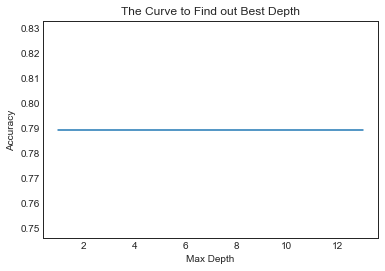

In [26]:
accu = []
for i in range(1,14):
    tree = DecisionTreeClassifier(max_depth = i, random_state=1)
    tree.fit(x_train, y_train)
    accu.append(tree.score(x_test, y_test))
    print("Max depth",i,"Accuracy",tree.score(x_test, y_test))
plt.plot(range(1,14),accu)
plt.title("The Curve to Find out Best Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

##### Reduced Dataset

Max depth 1 Accuracy 0.7368421052631579
Max depth 2 Accuracy 0.7368421052631579
Max depth 3 Accuracy 0.7631578947368421
Max depth 4 Accuracy 0.7368421052631579
Max depth 5 Accuracy 0.6842105263157895
Max depth 6 Accuracy 0.6842105263157895
Max depth 7 Accuracy 0.7631578947368421
Max depth 8 Accuracy 0.7368421052631579
Max depth 9 Accuracy 0.6578947368421053
Max depth 10 Accuracy 0.6578947368421053
Max depth 11 Accuracy 0.6578947368421053
Max depth 12 Accuracy 0.631578947368421
Max depth 13 Accuracy 0.7631578947368421
Max depth 14 Accuracy 0.6578947368421053
Max depth 15 Accuracy 0.7631578947368421
Max depth 16 Accuracy 0.7631578947368421
Max depth 17 Accuracy 0.7631578947368421
Max depth 18 Accuracy 0.7631578947368421
Max depth 19 Accuracy 0.7631578947368421


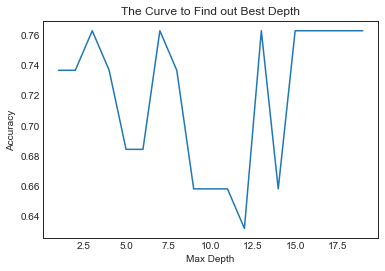

In [27]:
accu = []
for i in range(1,20):
    tree = DecisionTreeClassifier(max_depth = i, random_state=1)
    tree.fit(x_train_reduced, y_train_reduced)
    accu.append(tree.score(x_test_reduced, y_test_reduced))
    print("Max depth",i,"Accuracy",tree.score(x_test_reduced, y_test_reduced))
plt.plot(range(1,20),accu)
plt.title("The Curve to Find out Best Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

### K-Means Clustering

##### Original data

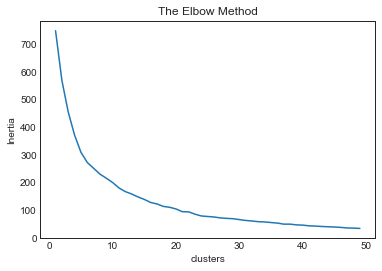

In [28]:
wcss=[]
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
#Static code to get max no of clusters
for i in range(1,50):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    #inertia_ is the formula used to segregate the data points into clusters
    
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,50), wcss)
plt.title('The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
kmeansmodel = KMeans(n_clusters=30, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x_train)
y_pred = kmeansmodel.labels_  # y_pred = kmean.predict(X)
y_pred

array([ 0, 23,  2,  4, 22,  9, 23,  3, 27, 10, 10, 22,  9,  7,  0, 13,  8,
       16, 21,  9,  9, 18,  7, 16,  7, 11,  0, 28,  1, 13,  3, 22,  0,  2,
        9,  8, 13,  3,  3,  0, 20,  0, 15, 27, 13, 29, 23, 16, 13,  6,  3,
       22,  8, 13, 29,  1, 13, 11, 22,  3, 14, 11,  6,  9, 27,  9, 16, 26,
       13,  3,  3, 10, 22, 11,  0, 12,  2,  5, 11,  0,  2, 13, 16,  9,  6,
       11, 10, 16, 22,  0, 21, 27, 13, 27,  9,  9,  3, 11, 22,  1, 27,  2,
       19, 25,  3,  2,  0,  0,  7, 29,  3,  8, 22, 13, 16,  3, 13,  5,  7,
       13,  9, 29, 22, 16, 13,  8, 16,  8,  3, 16, 13, 13, 17, 13, 22,  6,
       10, 25, 11, 27,  9,  7, 16,  3, 24, 13, 10, 13, 11, 26, 13,  1,  3,
       10, 22, 21, 16, 13,  9,  3,  7, 13, 13,  2, 25, 10, 22,  6])

In [30]:
# Evaluation indicators
inertia = kmeansmodel.inertia_
y = x_train[:,1]
# The adjusted Rand index gets a value close to 0 independent of sample size and category through the adjustment of Rand index, 
# and its value range is [- 1,1],
# Negative number means that the result is not good. The closer to 1, the better it is, 
# which means that the clustering result is more consistent with the real situation.
adjusted_rand_s = metrics.adjusted_rand_score(y, y_pred)

# If all clusters only contain data points belonging to members of a single cluster, the clustering results will meet the homogeneity.
# The larger the value range [0,1] means that the clustering results are more consistent with the real situation
homogeneity_s = metrics.homogeneity_score(y, y_pred)

# If all the data points as members of a given class are elements of the same cluster, 
# the clustering results meet the integrity.
# Its value range is [0,1]. The larger the value is, the more consistent the clustering result is with the real situation.
completeness_s = metrics.completeness_score(y, y_pred)

df_metrics = pd.DataFrame([[inertia, adjusted_rand_s, homogeneity_s,completeness_s]],
                         columns=['Inertias','Adjusted Rand Index','Homogeneity','Completeness'])

df_metrics

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


,Inertias,Adjusted Rand Index,Homogeneity,Completeness
0,50.88504,0.0,0.582744,1.0


##### Reduced dataset

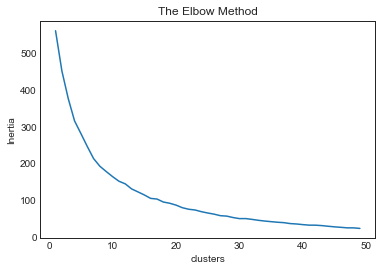

In [31]:
wcss=[]
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
#Static code to get max no of clusters
for i in range(1,50):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x_reduced)
    wcss.append(kmeans.inertia_)
    #inertia_ is the formula used to segregate the data points into clusters
    
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,50), wcss)
plt.title('The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
kmeansmodel = KMeans(n_clusters=30, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x_train_reduced)
y_pred = kmeansmodel.labels_  # y_pred = kmean.predict(X)
y_pred

array([14, 12, 16, 26, 14, 14, 29, 10,  4, 23, 14,  7,  4, 22,  0, 15,  6,
       16, 10,  0,  3,  0, 26,  0, 23, 27,  7,  2, 23,  6, 16,  8, 14,  8,
        8, 11,  0, 22,  8,  5,  0,  0, 22, 14,  6,  9, 17, 19, 26, 20,  0,
        8, 14, 14,  8, 16, 10,  3, 14, 12, 12, 14, 15, 18,  6, 23,  0, 21,
        3, 14,  9,  8, 26, 21, 14,  3, 13, 12, 25, 18, 12, 10, 10, 22,  7,
       12,  2, 12, 22, 12,  8, 23, 15,  9, 22, 28, 19, 23, 22, 16, 16,  0,
       22,  6,  6,  0, 17,  1, 16,  8,  9, 23, 23, 10, 22, 29, 26,  9,  9,
       22,  9,  0, 26, 18, 15, 14, 24, 19,  9,  0, 13,  9, 14, 16,  0,  3,
        3,  8,  6, 23,  0, 16,  9, 12,  0,  6,  9, 16, 22])

In [33]:
# Evaluation indicators
inertia = kmeansmodel.inertia_
y = x_train_reduced[:,1]
# The adjusted Rand index gets a value close to 0 independent of sample size and category through the adjustment of Rand index, 
# and its value range is [- 1,1],
# Negative number means that the result is not good. The closer to 1, the better it is, 
# which means that the clustering result is more consistent with the real situation.
adjusted_rand_s = metrics.adjusted_rand_score(y, y_pred)

# If all clusters only contain data points belonging to members of a single cluster, the clustering results will meet the homogeneity.
# The larger the value range [0,1] means that the clustering results are more consistent with the real situation
homogeneity_s = metrics.homogeneity_score(y, y_pred)

# If all the data points as members of a given class are elements of the same cluster, 
# the clustering results meet the integrity.
# Its value range is [0,1]. The larger the value is, the more consistent the clustering result is with the real situation.
completeness_s = metrics.completeness_score(y, y_pred)

df_metrics = pd.DataFrame([[inertia, adjusted_rand_s, homogeneity_s,completeness_s]],
                         columns=['Inertias','Adjusted Rand Index','Homogeneity','Completeness'])

df_metrics

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


,Inertias,Adjusted Rand Index,Homogeneity,Completeness
0,33.04597,0.0,0.607959,1.0


The reduced dataset is successful. But the problem here is that the model divides the dataset into about 30 clusters, however, we only has 3 classes, which means the classes can be divided more precisely. The point can be explored later.

### K-Nearest Neighbour

##### Original Data

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array 

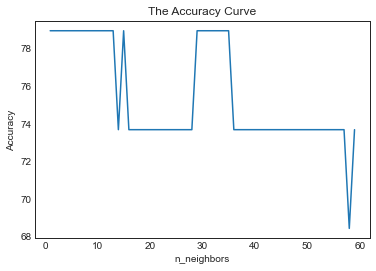

In [36]:
wcss=[]
for i in range(1,60):
    clf= KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    yhat = clf.predict(x_test)
    wcss.append(round(accuracy_score(y_test, yhat)*100, 2))
    
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,60), wcss)
plt.title('The Accuracy Curve')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

##### Reduced Dataset

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array 

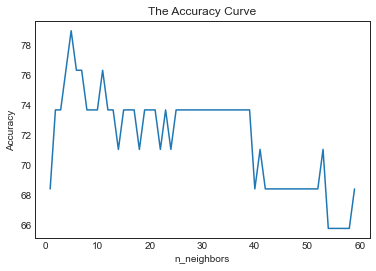

In [37]:
wcss=[]
for i in range(1,60):
    clf= KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_reduced,y_train_reduced)
    yhat = clf.predict(x_test_reduced)
    wcss.append(round(accuracy_score(y_test_reduced, yhat)*100, 2))
    
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,60), wcss)
plt.title('The Accuracy Curve')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

The problem here is also the classification of classes, there are around 180 data points, if we divide them into three classes, we need to have 60 data points of one classes, which means 60 neighbors. But it seems not very positive of the accuracy when the n_neighbors is 60. So the should be the problem of class classification.

### Multiple Linear Regression

##### Original Data

In [39]:
Linear_regress = LinearRegression()
Linear_regress.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = Linear_regress.predict(x_test)
y_pred

array([[ 0.33274462],
       [-0.19755912],
       [-1.20110503],
       [-1.33046978],
       [-0.79324627],
       [-0.88080274],
       [-0.36128358],
       [-0.62000788],
       [-0.79345724],
       [-0.30978001],
       [-0.68145682],
       [-0.60551832],
       [-0.89734913],
       [ 1.64292262],
       [ 0.68617412],
       [ 1.89176243],
       [-0.87562392],
       [ 1.50590736],
       [-0.3235483 ]])

In [42]:
mean_squared_error(y_test, y_pred)

0.5592308438656959

##### Reduced Dataset

In [43]:
Linear_regress = LinearRegression()
Linear_regress.fit(x_train_reduced, y_train_reduced)
y_pred = Linear_regress.predict(x_test_reduced)
mean_squared_error(y_test_reduced, y_pred)

0.5860860597042281

### Random Forest

##### Original Dataset

In [61]:
clf1 = RandomForestClassifier(n_estimators=10, max_depth=5,min_samples_split=2, random_state=0)
score = cross_val_score(clf1, x_train, y_train)
score.mean()

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation

0.7552584670231728

Find best depth

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation

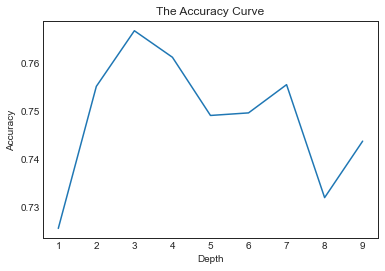

In [71]:
accu=[]
for i in range(1,10):
    clf1 = RandomForestClassifier(n_estimators=10, max_depth=i,min_samples_split=2, random_state=0)
    score = cross_val_score(clf1, x_train, y_train)
    accu.append(score.mean())
    
plt.plot(range(1,10), accu)
plt.title('The Accuracy Curve')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

Find best n_estimators

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation

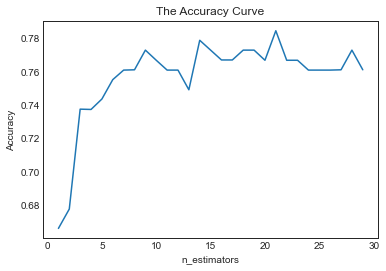

The best accuracy is 0.7844919786096256


In [72]:
accu=[]
for i in range(1,30):
    clf1 = RandomForestClassifier(n_estimators=i, max_depth=3,min_samples_split=2, random_state=0)
    score = cross_val_score(clf1, x_train, y_train)
    accu.append(score.mean())
    
plt.plot(range(1,30), accu)
plt.title('The Accuracy Curve')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()
print("The best accuracy is", np.array(accu).max())

##### Reduced Dataset

In [58]:
clf2 = RandomForestClassifier(n_estimators=10, max_depth=5,min_samples_split=2, random_state=0)
score = cross_val_score(clf2, x_train_reduced, y_train_reduced)
score.mean()

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation

0.7919540229885058

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation

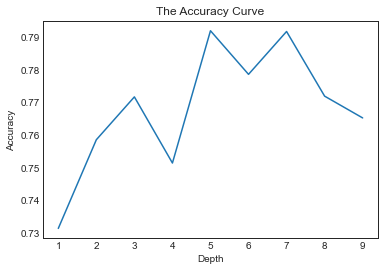

In [69]:
accu=[]
for i in range(1,10):
    clf2 = RandomForestClassifier(n_estimators=10, max_depth=i,min_samples_split=2, random_state=0)
    score = cross_val_score(clf2, x_train_reduced, y_train_reduced)
    accu.append(score.mean())
    
plt.plot(range(1,10), accu)
plt.title('The Accuracy Curve')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
e:\python projects\trial peoject\venv\lib\site-packages\sklearn\model_selection\_validation

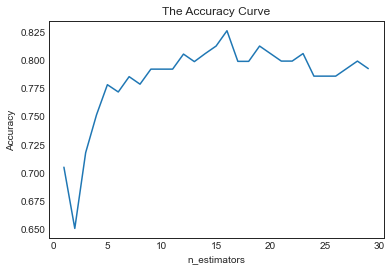

The best accuracy is 0.825977011494253


In [70]:
accu=[]
for i in range(1,30):
    clf1 = RandomForestClassifier(n_estimators=i, max_depth=5,min_samples_split=2, random_state=0)
    score = cross_val_score(clf1, x_train_reduced, y_train_reduced)
    accu.append(score.mean())
    
plt.plot(range(1,30), accu)
plt.title('The Accuracy Curve')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()
print("The best accuracy is", np.array(accu).max())